# **ROSYIIDAH DHIYA'ULHAQ**
**19/446468/TK/49573**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/3.png" "/content/"
!cp "/content/3_mod.png" "/content/"
!cp "/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png" "/content/"

cp: '/content/3.png' and '/content/3.png' are the same file
cp: '/content/3_mod.png' and '/content/3_mod.png' are the same file
cp: '/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png' and '/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png' are the same file


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
from matplotlib.colors import NoNorm
from PIL import Image, ImageFilter, ImageEnhance

# **Soal Nomor 1 (Citra 1)**


Text(0.5, 1.0, 'Asli')

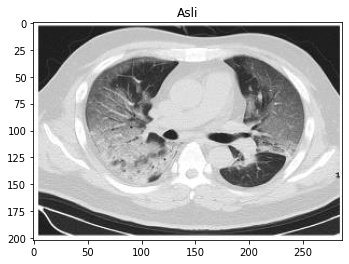

In [ ]:
img = cv2.imread("/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png", cv2.IMREAD_GRAYSCALE)
cv2.imwrite('/content/img.jpg', img)
plt.imshow(img, cmap = "gray")
plt.title('Asli')



---


---






---



---



**1. a olah citra dengan transformasi logaritmik**

In [ ]:
r = np.arange(0,256)
c = 255/(np.log(1+255))
image_ori = io.imread("COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


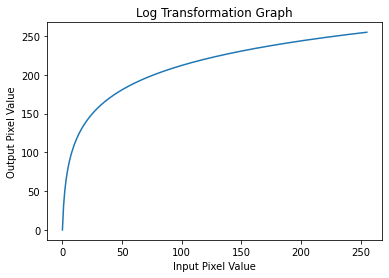

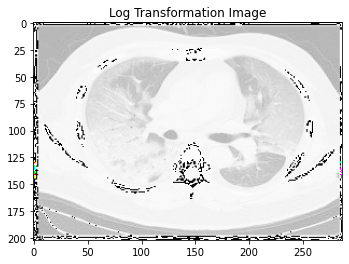

In [ ]:
#LOG TRANSFORMATION
y1 = c*np.log(1+r) #Grafik Log
plt.plot(r,y1);
plt.title("Log Transformation Graph")
plt.xlabel("Input Pixel Value")
plt.ylabel("Output Pixel Value")
log_image = c*np.log(image_ori + 1)
log_image = np.array(log_image, dtype = np.uint8)
plt.figure()
plt.imshow(log_image, cmap = "gray", norm=NoNorm())
plt.title('Log Transformation Image')
plt.show ()

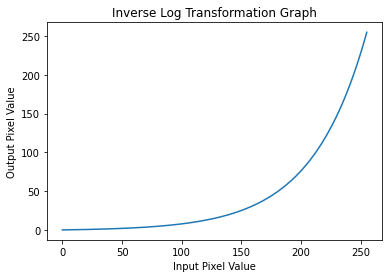

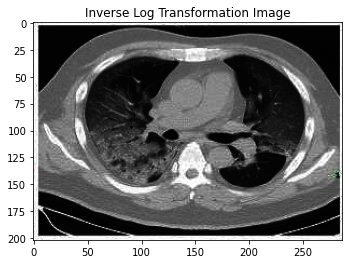

In [ ]:
#INVERSE LOG TRANSFORMATION
y2 = np.exp(r)** (1/c) - 1 #Grafik Inverse Log
plt.plot(r,y2);
plt.title("Inverse Log Transformation Graph")
plt.xlabel("Input Pixel Value")
plt.ylabel("Output Pixel Value")
invlog_image = np.exp(image_ori**1/c)-1
invlog_image = np.array(invlog_image, dtype = np.uint8)
plt.figure()
plt.imshow(invlog_image, cmap = "gray", norm=NoNorm())
plt.title('Inverse Log Transformation Image')
plt.show ()

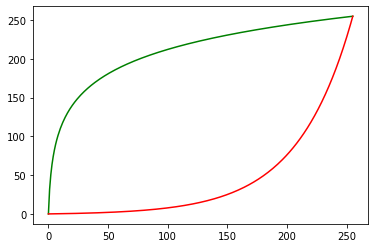

In [ ]:
#GRAFIK LOG TRANSFORMATION
plt.plot(r,y1, color = 'g');
plt.plot(r,y2, color = 'r');

**1. b Kembalikan citra hasil transformasi logaritmik ke citra awal.**

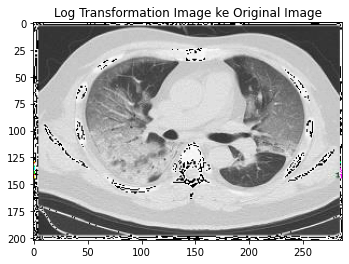

In [ ]:
#Log Transformation Image ke Original Image
imag1 = np.exp(log_image**1/c)-1
imag1 = np.array(imag1, dtype = np.uint8)
plt.figure()
cv2.imwrite('/content/imag1.jpg', imag1)
plt.imshow(imag1, cmap = "gray", norm=NoNorm())
plt.title('Log Transformation Image ke Original Image')
plt.show ()

> Cara mengubah Log Transformation Image ke Original Image

dalam mengembalikan citra log transformation ke aslinya, saya melakukan inverse logaritma ke gambar hasil transformasi.

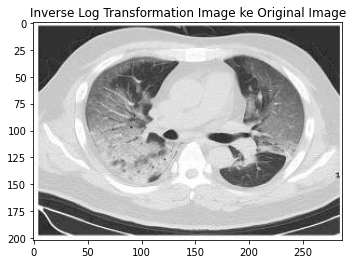

In [ ]:
#Inverse Log Transformation Image ke Original Image
imag2 = c*np.log(invlog_image + 1)
imag2 = np.array(imag2, dtype = np.uint8)
plt.figure()
cv2.imwrite('/content/imag2.jpg', imag2)
plt.imshow(imag2, cmap = "gray", norm=NoNorm())
plt.title('Inverse Log Transformation Image ke Original Image')
plt.show ()

> Cara mengubah Inverse Log Transformation Image ke Original Image

dalam mengembalikan citra inverse log transformation ke aslinya, saya menggunakan fungsi logaritma ke gambar hasil transformasi.



---



---





> Amati hasilnya dan buktikan dengan teknik structural similarity index (SSIM)


Pada gambar hasil log transformation ke gambar asli masih terdapat noise yang terlihat. Sedangkan hasil inverse log transformation ke gambar asli hampir sama, hal tersebut dibuktikan dengan hasil SSIM dibawah ini, yang mana semakin besar angka yang dihasilkan, maka berarti gambar tersebut diindikasi mirip.

In [ ]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity
def structural_sim(img1, img2):
  sim, diff = structural_similarity(img1, img2, full=True)
  return sim
imga = cv2.imread('/content/img.jpg', 0)
imgb = cv2.imread('/content/imag1.jpg', 0)
imgc = cv2.imread('/content/imag2.jpg', 0)

from skimage.transform import resize
imgd = resize(imga, (imgb.shape[0], imgb.shape[1]), anti_aliasing=True, preserve_range=True)

#Similarity gambar hasil log transformation dengan gambar asli
ssim1 = structural_sim(imgb, imgd)
print("Nilai SSIM adalah: ", ssim1)
#Similarity gambar hasil inverse log transformation dengan gambar asli
ssim2 = structural_sim(imgc, imgd)
print("Nilai SSIM adalah: ", ssim2)

Nilai SSIM adalah:  0.8313272965527252
Nilai SSIM adalah:  0.984786684137932


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  after removing the cwd from sys.path.


**1. c Dari citra asli dan citra hasil olahan, bandingkan dan analisislah mana yang dapat menghasilkan citra yang lebih baik.**

In [ ]:
#CHE
def imhist(im): #menghitung histogram gambar yang dinormalisasi
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumulative_sum(h):
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
  #get image histogram
	hist = imhist(im)
  #get cumulative distribution function
	cdf = np.array(cumulative_sum(hist))
  #calculate new values
	new_val = np.uint8(255 * cdf)
	s1, s2 = im.shape
	X = np.zeros_like(im)
	#gunakan new values untuk masing-masing pixel
	for i in range(0, s1):
		for j in range(0, s2):
			X[i, j] = new_val[im[i, j]]
	new_hist = imhist(X)

	return X , hist, new_hist, new_val

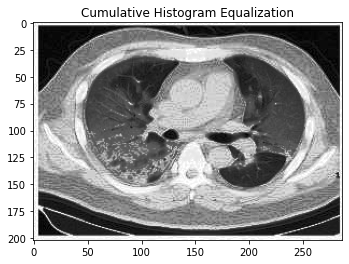

In [ ]:
import matplotlib.image as mpimg

imge = np.uint8(mpimg.imread('COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png')*255.0)
# convert ke grayscale
imge = np.uint8((0.2126* imge[:,:,0]) + \
 		np.uint8(0.7152 * imge[:,:,1]) +\
		 np.uint8(0.0722 * imge[:,:,2]))

new_img, hist, new_hist, new_val = histeq(imge)

plt.imshow(new_img, cmap = "gray")
plt.show()

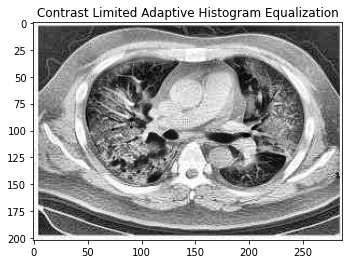

In [ ]:
#CLAHE
clahe_image = cv2.imread('COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png',0)
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = clahe.apply(clahe_image)
plt.imshow(clahe_img, cmap = "gray")
plt.show()

> Perbandingan hasil gambar CHE dan CLAHE :

Hasil olahan CLAHE memiliki kontras lebih bagus, sehingga detail gambar lebih terlihat walaupun hanya memakai mata telanjang. Sedangkan hasil olahan CHE terlihat lebih gelap, sehingga detail gambar tidak terlalu terlihat. Makadariitu, dari hasil perbandingan tersebut CLAHE menghasilkan citra lebih baik.

# **Soal nomor 2 (Citra 2)**

Text(0.5, 1.0, 'Asli')

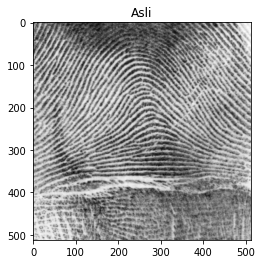

In [ ]:
#GAMBAR ASLI
image = cv2.imread("/content/3.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = "gray")
plt.title('Asli')

**2. a Olah citra 2 asli dengan filter-filter yang sudah dijelaskan (mean, median,gaussian, dan sharpening). Jelaskan dampak dari masing-masing filter tersebut terhadap citra.**

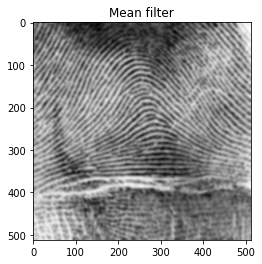

In [ ]:
#MEAN FILTER
mean_image = cv2.blur(image,(7,7))
plt.imshow(mean_image, cmap="gray")
plt.title('Mean filter')
plt.show()



---



---




> Dampak Mean Filter

Gambar yang dihasilkan blurry dari gambar asinya, sehingga detail gambar tidak terlihat



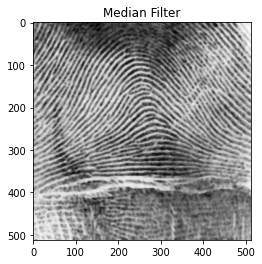

In [ ]:
#MEDIAN FILTER
median_image = cv2.medianBlur(image, 5)
plt.imshow(median_image, cmap = "gray")
plt.title('Median Filter')
plt.show()


> Dampak Median Filter

Gambar yang dihasilkan tidak terlalu berbeda dengan gambar Mean filter, namun efek blur yang terlihat tidak terlalu besar dibandingkan gambar hasil Mean Filter


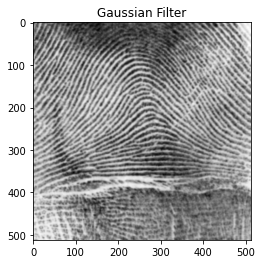

In [ ]:
#GAUSSIAN FILTER
gauss_image = cv2.GaussianBlur(image, (5,5),0)
plt.imshow(gauss_image, cmap = "gray")
plt.title('Gaussian Filter')
plt.show()



> Dampak Gaussian Filter

Gambar yang dihasilkan juga hampir sama dengan hasil gambar Mean Filter, namun efek blurrynya lebih baik dibanding hasil gambar Mean dan Median Filter



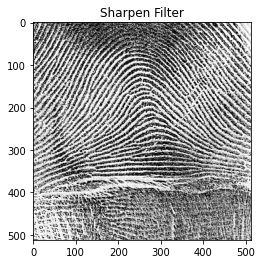

In [ ]:
#SHARPENING FILTER
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32)
sharpen_image = cv2.filter2D(image, -1, kernel)
plt.imshow(sharpen_image, cmap = "gray")
plt.title('Sharpen Filter')
plt.show()


> Dampak Sharpen Filter

Struktur garis dan detail gambar yang dihasilkan lebih tajam

**2. b Cobalah untuk melakukan perbaikan terhadap citra 2 rusak sehingga dapat kembali/mendekati bentuk citra 2 asli.**

Text(0.5, 1.0, 'Asli')

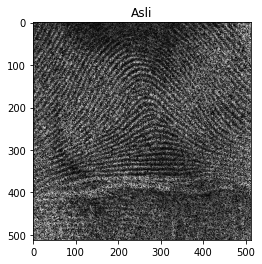

In [ ]:
#GAMBAR ASLI
image_rusak = cv2.imread("/content/3_mod.png", cv2.IMREAD_GRAYSCALE)
cv2.imwrite('/content/image_rusak.jpg', image_rusak)
plt.imshow(image_rusak, cmap = "gray")
plt.title('Asli')

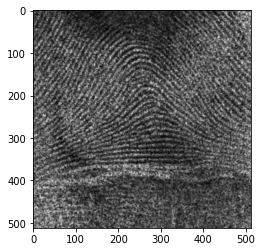

In [ ]:
#Memakai Gaussian Filter
gauss_imag = cv2.GaussianBlur(image_rusak, (5, 5),0)
plt.imshow(gauss_imag, cmap = "gray")
plt.show()

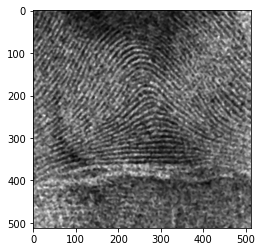

In [ ]:
#Memakai Median Filter
median_imag = cv2.medianBlur(gauss_imag, 5)
plt.imshow(median_imag, cmap = "gray")
plt.show()

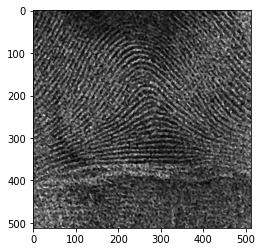

In [ ]:
#Memakai Sharpen Filter
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32)
sharpen_imag = cv2.filter2D(median_imag, -1, kernel)
cv2.imwrite('sharpen_imag.jpg',sharpen_imag)
plt.imshow(sharpen_imag, cmap = 'gray')

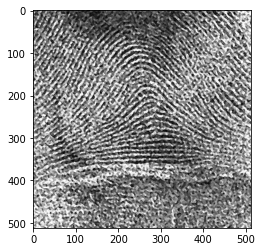

In [ ]:
#Meningkatkan Brightness Gambar
def brightness(input_img, output_img, factor):
    img_bright = Image.open(input_img)
    gambar = ImageEnhance.Brightness(img_bright)
    out = gambar.enhance(factor)
    out.save(output_img)

if __name__ == '__main__':
    brightness('sharpen_imag.jpg','/content/bright_image.jpg',1.9)

bright_image = cv2.imread("/content/bright_image.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(bright_image, cmap = "gray")



> Bandingkan hasil perbaikan dengan citra 2 asli dengan teknik signal noise to ratio (SNR) dan structural similarity index (SSIM).



In [ ]:
def signaltonoise(array, axis=0, ddof=0):
    array = np.asanyarray(array)
    avg = array.mean(axis)
    sd = array.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, avg/sd)

In [ ]:
#Signal-to-Noise Ratio (SNR)
rusak_snr = signaltonoise(image_rusak, axis=None)
bright_snr = signaltonoise(bright_image, axis=None)

print("Nilai SNR citra 2 rusak: ", rusak_snr)
print("Nilai SNR citra diperbaiki: ", bright_snr)

Nilai SNR citra 2 rusak:  0.8930445228688549
Nilai SNR citra diperbaiki:  1.804171838743779


In [ ]:
#Peak signal-to-noise ratio (PSNR)
def psnr(image1, image2):
  print('Nilai PSNR (dB): ', cv2.PSNR(image1, image2))
imge1 = cv2.cvtColor(io.imread('/content/image_rusak.jpg'), 0)
imge2 = cv2.cvtColor(io.imread('/content/bright_image.jpg'), 0)
psnr(imge1, imge2)

Nilai PSNR (dB):  9.071462371424776


In [ ]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity
def structural_sim(img1, img2):
  sim, diff = structural_similarity(img1, img2, full=True)
  return sim
image1 = cv2.imread('/content/image_rusak.jpg', 0)
image2 = cv2.imread('/content/bright_image.jpg', 0)

from skimage.transform import resize
image4 = resize(image1, (image2.shape[0], image2.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(image2, image4)
print("Similarity menggunakan SSIM adalah: ", ssim)

Similarity menggunakan SSIM adalah:  0.2094166650114552


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  after removing the cwd from sys.path.




> Jelaskan pula cara yang dilakukan dalam proses tersebut (termasuk menyebutkan filter apa saja yang digunakan serta parameter-parameternya).

Dalam mencoba memperbaiki gambar citra 2 rusak, (1) pertama, saya menggunakan Gaussian Filter, hal tersebut dikarenakan pada soal 2.a sebelumnya hasil Gaussian Filterlah yang paling jelas dalam menampakkan detail gambar, (2) kedua, saya menggunakan Median Filter untuk memperjelas detail gambar, (3) ketiga, saya menggunakan Sharpen Filter, hal tersebut dimaksudkan untuk mempertajam detail gambar, (4) keempat, saya mencoba untuk meningkatkan brightness dari gambar, agar gambar lebih terlihat.

Hasil percobaan untuk memperbaiki gambar citra 2 yang rusak belum maksimal, gambar yang didapatkan masih blurry, sehingga detail tidak tajam.

.

# **Soal nomor 3**

**Apakah anda menyelesaikan tugas/pekerjaan ini dengan jujur dan bertanggung jawab, tidak melakukan tindakan kecurangan, pelanggaran, plagiasi, mencontek, saling tukar-menukar jawaban, copy paste jawaban?**


> Iya, saya menyelesaikan tugas/pekerjaan ini dengan jujur dan bertanggung jawab.

